In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
fourvar = sio.loadmat('Weights_Rat1_4vars.mat')

In [3]:
mousenums = ['355', '362', '673', '674', '816', '825']

In [4]:
for mouse in mousenums:
    calc1, calc2, inds = getcalcs(foldnames, mouse, 'epm', 'rat1', returnInds=True, denoise=False)
    print(mouse, fourvar[mouse].shape, np.sum(inds[0]))

355 (30, 4) 30
362 (37, 4) 37
673 (51, 4) 51
674 (39, 4) 39
816 (78, 4) 78
825 (65, 4) 65


In [5]:
fourvarweights = np.concatenate([fourvar[mouse] for mouse in mousenums])

In [6]:
fourvarweights.shape

(300, 4)

In [7]:
ctypes = []
armscores = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc1, calc2, inds = getcalcs(foldnames, mouse, 'epm', 'rat1', returnInds=True, denoise=False)
    for k in range(calc1.shape[1]):
        ctype = celltypebehav(calc1[:, k], behav)
        ctypes.append(ctype)
        armscores.append(armscorebehav(calc1[:, k], behav))
ctypes = np.array(ctypes)

In [8]:
for typ in ['o', 'n', 'c']:
    print(np.sum(ctypes == typ))

62
155
83


In [4]:
variables = ['approach', 'escape', 'freeze', 'stretch']

approach RanksumsResult(statistic=4.172341070447826, pvalue=3.0148588447371044e-05)
freeze RanksumsResult(statistic=-3.7167406087322585, pvalue=0.000201809447589106)


Text(0, 0.5, 'mean GLM weight (rat)')

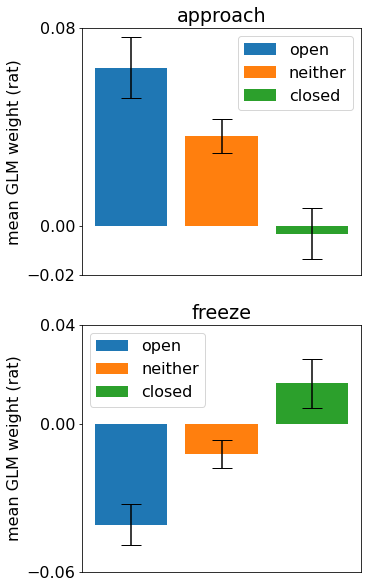

In [11]:
plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
k = 0
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(fourvarweights[ctypes==typ, k]))
plt.legend(['open', 'neither', 'closed'])
for i, typ in enumerate(['o', 'n', 'c']):
    plt.errorbar(i, np.mean(fourvarweights[ctypes==typ, k]), sem(fourvarweights[ctypes==typ, k]), 
                 fmt='k_', ms=0, capsize=10)
plt.ylim(-0.02, 0.08)
plt.yticks([-0.02, 0, 0.08])
plt.xticks([])
print('approach', ranksums(fourvarweights[ctypes=='o', k], fourvarweights[ctypes=='c', k]))
plt.title('approach')
plt.ylabel('mean GLM weight (rat)')

plt.subplot(2, 1, 2)
k = 2
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(fourvarweights[ctypes==typ, k]))
plt.legend(['open', 'neither', 'closed'])
for i, typ in enumerate(['o', 'n', 'c']):
    plt.errorbar(i, np.mean(fourvarweights[ctypes==typ, k]), sem(fourvarweights[ctypes==typ, k]), 
                 fmt='k_', ms=0, capsize=10)
plt.ylim(-0.06, 0.04)
plt.yticks([-0.06, 0, 0.04])
plt.xticks([])
print('freeze', ranksums(fourvarweights[ctypes=='o', k], fourvarweights[ctypes=='c', k]))
plt.title('freeze')
plt.ylabel('mean GLM weight (rat)')

plt.savefig('./elife_figs/3K.svg')